In [216]:
# Import libraries
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import root_mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

# For splitting the data
from sklearn.model_selection import train_test_split, GridSearchCV

# For the Decision Tree Classifier
from sklearn.tree import plot_tree

# For evaluation
from sklearn.metrics import roc_auc_score, roc_curve

%matplotlib inline

rs = 1234

In [217]:
# Load the dataset
churn_data = pd.read_csv("C:/Users/Jeffrey Tolmachewich/OneDrive - University of Delaware - o365/BHDAC Fall 2024/customer_churn_data.csv")

#Creating backup dataset
churn_data_backup = churn_data.copy()

In [218]:
#Inspecting the data
churn_data.dtypes
churn_data.head()
churn_data.tail()
churn_data.info()
churn_data.describe().T
churn_data.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,1000.0,NaN,NaN,NaN,500.5,288.819436,1.0,250.75,500.5,750.25,1000.0
Age,1000.0,NaN,NaN,NaN,44.674,9.797741,12.0,38.0,45.0,51.0,83.0
Gender,1000,2,Female,538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tenure,1000.0,NaN,NaN,NaN,18.973,18.89257,0.0,5.0,13.0,26.0,122.0
MonthlyCharges,1000.0,NaN,NaN,NaN,74.39129,25.712083,30.0,52.3575,74.06,96.1025,119.96
ContractType,1000,3,Month-to-Month,511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,703,2,Fiber Optic,395,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalCharges,1000.0,NaN,NaN,NaN,1404.36406,1571.755048,0.0,345.2175,872.87,1900.175,12416.25
TechSupport,1000,2,Yes,506,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Churn,1000,2,Yes,883,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [219]:
churn_data.isna().sum().sum()

297

In [220]:
churn_data.duplicated().sum()

0

In [221]:
churn_data["Churn"].value_counts()

Churn
Yes    883
No     117
Name: count, dtype: int64

In [222]:
# Detecting outliers using quantiles
quantile_95 = churn_data['Age'].quantile(0.95)
print(f"95th percentile value of 'Age': {quantile_95}")

quantile_95 = churn_data['Tenure'].quantile(0.95)
print(f"95th percentile value of 'Tenure': {quantile_95}")

quantile_95 = churn_data['TotalCharges'].quantile(0.95)
print(f"95th percentile value of 'TotalCharges': {quantile_95}")

95th percentile value of 'Age': 61.0
95th percentile value of 'Tenure': 60.049999999999955
95th percentile value of 'TotalCharges': 4465.722000000001


In [223]:
#Drop CustomerID (not predictor for churn)
churn_data = churn_data.drop(columns=['CustomerID'])

# Dropping rows with missing values
churn_data = churn_data.dropna()

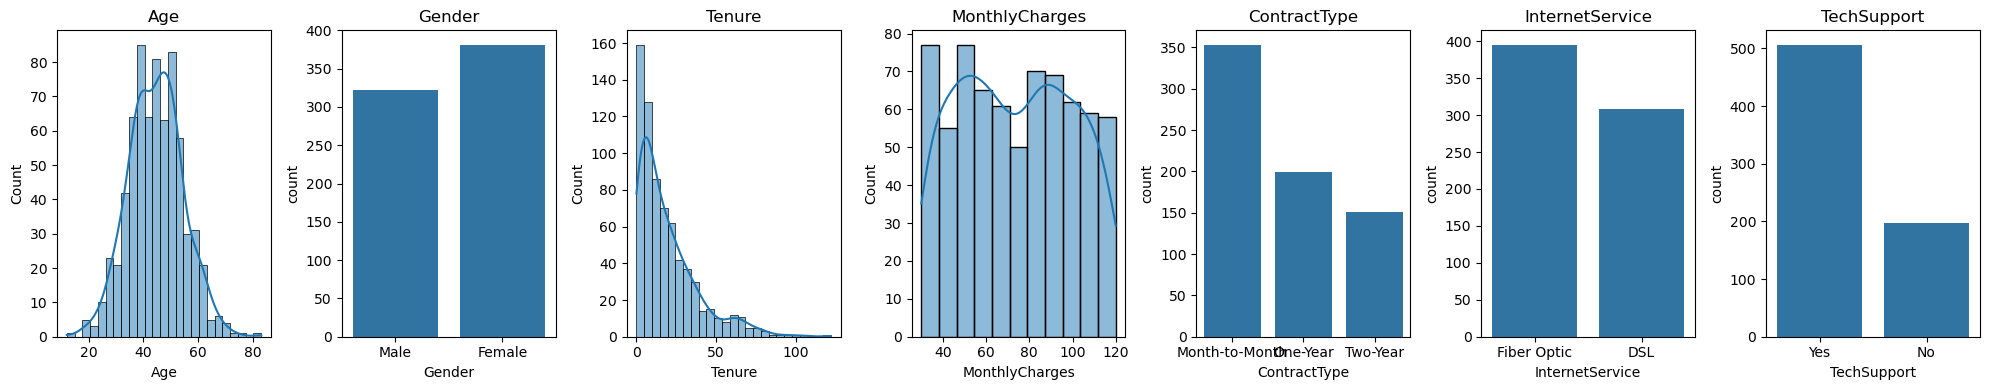

In [224]:
cols = ['Age', 'Gender', 'Tenure', 'MonthlyCharges', 'ContractType', 'InternetService', 'TechSupport']

plt.figure(figsize=(20, 4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i + 1)
    # Check if column is numerical or categorical
    if churn_data[col].dtype == 'object' or churn_data[col].nunique() < 20:  # Adjust threshold as needed
        sns.countplot(x=col, data=churn_data, ax=ax)
    else:
        sns.histplot(churn_data[col], kde=True, ax=ax)
    ax.set_title(f"{col}")

plt.tight_layout()
plt.show()

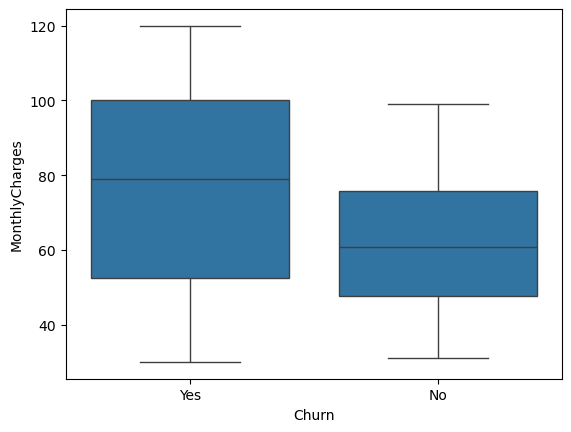

In [57]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=churn_data)
plt.show()

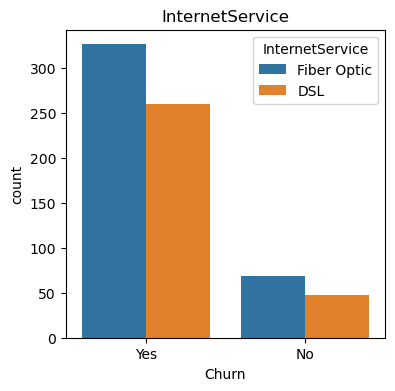

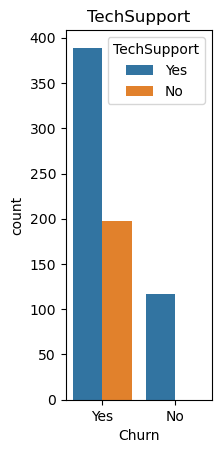

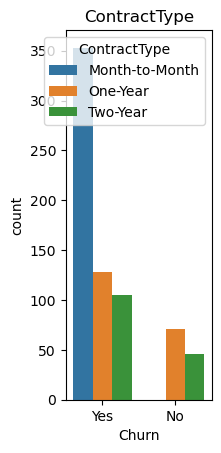

In [225]:
cols = ['InternetService','TechSupport','ContractType']

plt.figure(figsize=(14,4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x ="Churn", hue = str(col), data = churn_data)
    ax.set_title(f"{col}")
    plt.show()

In [226]:
# Replace missing values with 'None'
churn_data['InternetService'] = churn_data['InternetService'].fillna('None')

In [245]:
# Define features and target variable
X = churn_data[['Age', 'Gender', 'Tenure', 'MonthlyCharges']]  # Features
y = churn_data[['Churn']]  # Target variable

In [246]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
5,42,Female,16,119.75
...,...,...,...,...
991,24,Male,32,81.93
993,38,Male,4,102.27
994,34,Female,1,78.63
995,42,Male,41,37.14


In [247]:
X['Gender'] = X['Gender'].apply(lambda x: 1 if x == 'Female' else 0)

C:\Users\Jeffrey Tolmachewich\AppData\Local\Temp\ipykernel_15924\3384624874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = X['Gender'].apply(lambda x: 1 if x == 'Female' else 0)


In [248]:
y

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
5,Yes
...,...
991,Yes
993,Yes
994,Yes
995,Yes


In [249]:
y['Churn'] = y['Churn'].apply(lambda x : 1 if x =='Yes' else 0)

C:\Users\Jeffrey Tolmachewich\AppData\Local\Temp\ipykernel_15924\1436457580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Churn'] = y['Churn'].apply(lambda x : 1 if x =='Yes' else 0)


In [250]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

In [251]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

In [252]:
import joblib 
joblib.dump(scaler, 'scaler.pkl') 

['scaler.pkl']

In [253]:
X_test = scaler.fit_transform(X_test)

In [254]:
from sklearn.metrics import accuracy_score 
def modelperformance(predictions):
    print('Accuracy score on model is {}'.format(accuracy_score(y_test, predictions)))

In [255]:
from sklearn.model_selection import GridSearchCV

In [256]:
log_model = LogisticRegression()

In [258]:
import warnings 
warnings.filterwarnings('ignore')

In [257]:
log_model.fit(X_train, y_train)

c:\Users\Jeffrey Tolmachewich\anaconda3\envs\bhdac.1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [259]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
5,42,1,16,119.75
...,...,...,...,...
991,24,0,32,81.93
993,38,0,4,102.27
994,34,1,1,78.63
995,42,0,41,37.14


In [261]:
y_pred = log_model.predict(X_test)

In [262]:
modelperformance(y_pred)

Accuracy score on model is 0.8014184397163121


In [263]:
from sklearn.neighbors import KNeighborsClassifier

In [264]:
param_grid = {
    "n_neighbors": [3,5,7,9],
    'weights': ['uniform', 'distance'],
    }

In [265]:
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)

In [266]:
gridkn.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [267]:
gridkn.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [268]:
y_pred = gridkn.predict(X_test)

In [269]:
modelperformance(y_pred)

Accuracy score on model is 0.8156028368794326


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [271]:
param_grid = {
    'n_estimators' : [32,64,128,256],
    'max_features' : [2,3,4],
    'bootstrap' : [True, False]
}

In [272]:
grid_rfc = GridSearchCV(rfc_model, param_grid, cv = 5)

In [273]:
grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [274]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 128}

In [276]:
y_pred = grid_rfc.predict(X_test)

In [277]:
modelperformance(y_pred)

Accuracy score on model is 0.7872340425531915


In [283]:
from sklearn.metrics import classification_report

# Assuming 'y_test' are the true labels and 'y_pred' are the predicted labels from your model
y_pred = grid_rfc.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.25      0.32        28
           1       0.83      0.92      0.87       113

    accuracy                           0.79       141
   macro avg       0.63      0.59      0.60       141
weighted avg       0.75      0.79      0.76       141



In [278]:
best_model = gridkn.best_estimator_

          Feature  Importance
2          Tenure    0.413770
3  MonthlyCharges    0.360340
0             Age    0.188773
1          Gender    0.037116


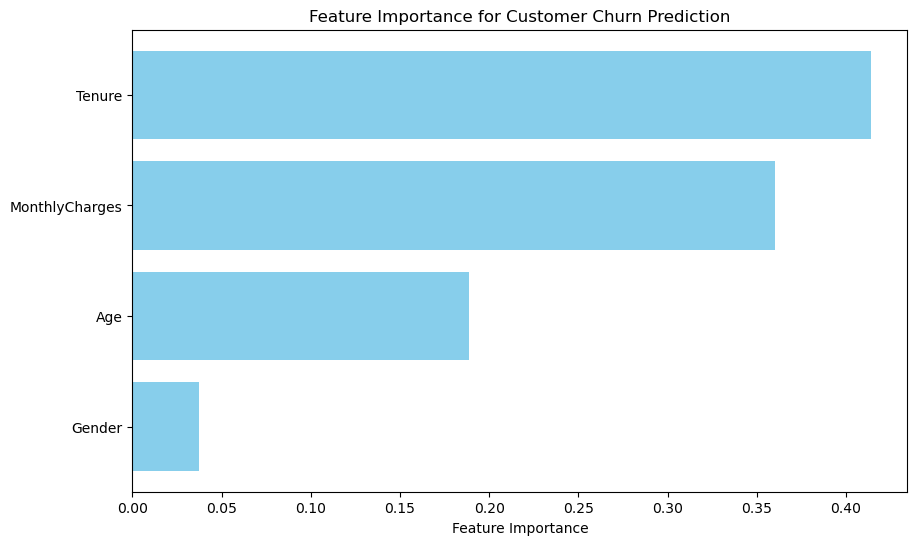

In [282]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your trained model is 'grid_rfc' (Random Forest model from GridSearchCV)

# Get feature importances from the best model
feature_importances = grid_rfc.best_estimator_.feature_importances_

# If your features are stored in a DataFrame 'X' or 'X_train', use their columns
# (If you used a scaler, use the original feature names before scaling)
features = X.columns

# Create a DataFrame to hold feature names and their importance values
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top features by importance
print(importance_df)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Customer Churn Prediction')
plt.gca().invert_yaxis()  # To display the most important features at the top
plt.show()


In [279]:
joblib.dump(best_model, 'model.pkl')

['model.pkl']